# Data Wrangling & Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style="whitegrid")
%matplotlib inline

In [3]:
df = pd.read_csv("train.csv")
print("Dataset Shape:", df.shape)

Dataset Shape: (2930, 82)


In [4]:
df.head(10)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500
9,10,527162130,60,RL,60.0,7500,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,189000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [6]:
df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [7]:
print(df.columns.tolist())

['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Wood Deck 

In [8]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("Columns with missing values:\n", missing)

Columns with missing values:
 Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
Fireplace Qu      1422
Lot Frontage       490
Garage Cond        159
Garage Qual        159
Garage Finish      159
Garage Yr Blt      159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Cond           80
Bsmt Qual           80
BsmtFin Type 1      80
Mas Vnr Area        23
Bsmt Half Bath       2
Bsmt Full Bath       2
BsmtFin SF 1         1
Garage Cars          1
Garage Area          1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
Electrical           1
dtype: int64


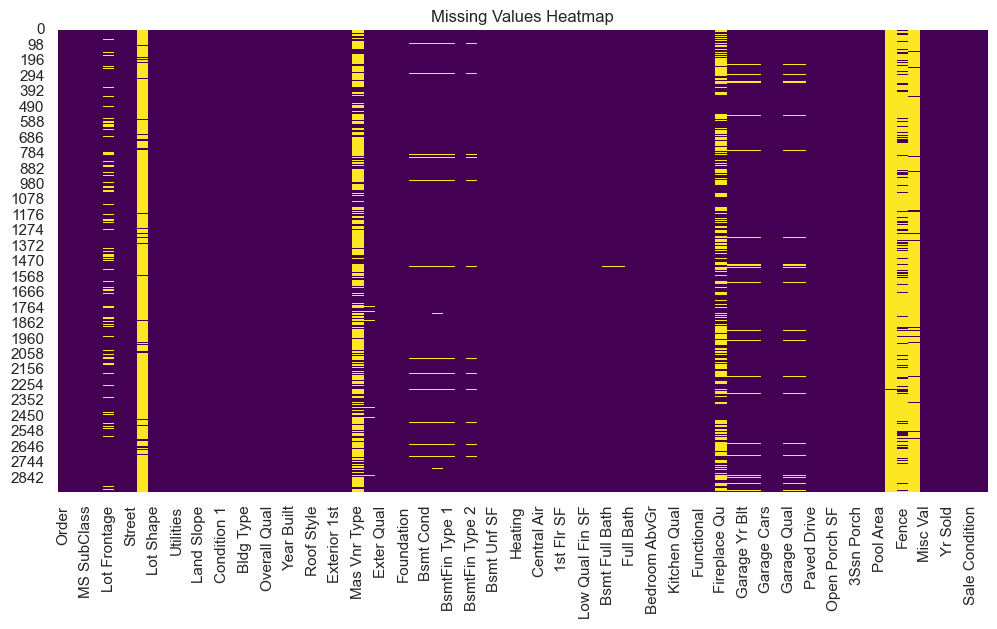

In [9]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

# Exploratory Data Analysis (EDA)

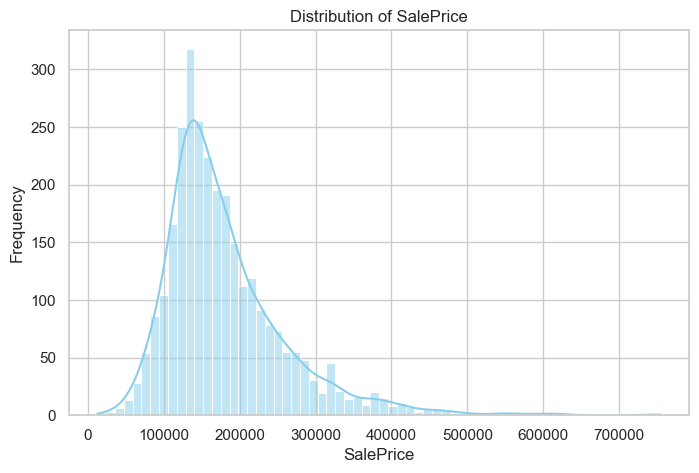

In [10]:
plt.figure(figsize=(8, 5))
sns.histplot(df["SalePrice"], kde=True, color="skyblue")
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()

In [11]:
print("Skewness:", df["SalePrice"].skew())
print("Kurtosis:", df["SalePrice"].kurt())

Skewness: 1.7435000757376466
Kurtosis: 5.118899951130896


In [12]:
corr = df.corr(numeric_only=True)

In [13]:
top_corr = corr["SalePrice"].sort_values(ascending=False)[1:11]
print("Top correlated features:\n", top_corr)

Top correlated features:
 Overall Qual      0.799262
Gr Liv Area       0.706780
Garage Cars       0.647877
Garage Area       0.640401
Total Bsmt SF     0.632280
1st Flr SF        0.621676
Year Built        0.558426
Full Bath         0.545604
Year Remod/Add    0.532974
Garage Yr Blt     0.526965
Name: SalePrice, dtype: float64


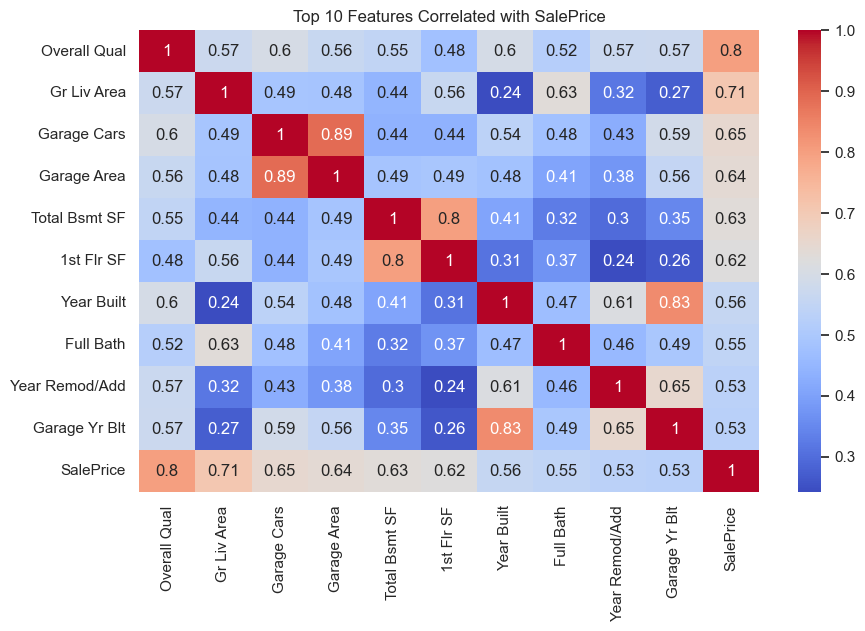

In [14]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[top_corr.index.tolist() + ["SalePrice"]].corr(), annot=True, cmap="coolwarm")
plt.title("Top 10 Features Correlated with SalePrice")
plt.show()

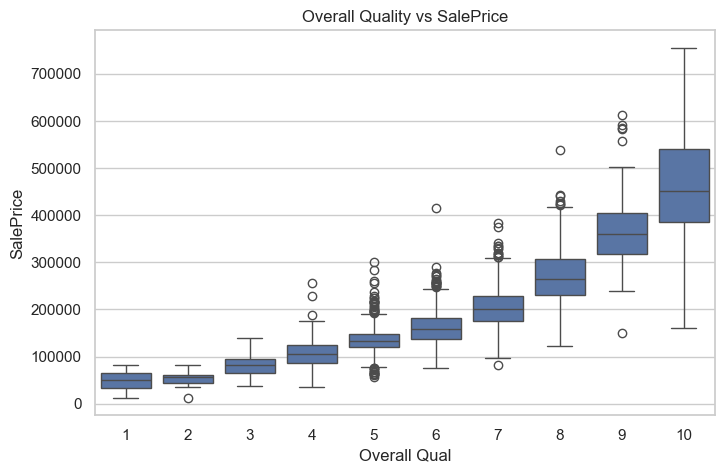

In [15]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Overall Qual", y="SalePrice", data=df)
plt.title("Overall Quality vs SalePrice")
plt.show()

# Feature Engineering

Handling missing values

In [16]:
missing_values = df.isnull().sum()

In [17]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(df['Lot Frontage'].median())
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(df['Mas Vnr Area'].median())
df['Bsmt Qual'] = df['Bsmt Qual'].fillna('No Basement')
df['Bsmt Cond'] = df['Bsmt Cond'].fillna('No Basement')
df['Bsmt Exposure'] = df['Bsmt Exposure'].fillna('No Basement')
df['BsmtFin Type 1'] = df['BsmtFin Type 1'].fillna('No Basement')
df['BsmtFin Type 2'] = df['BsmtFin Type 2'].fillna('No Basement')
df['Garage Type'] = df['Garage Type'].fillna('No Garage')
df['Garage Finish'] = df['Garage Finish'].fillna('No Garage')
df['Garage Qual'] = df['Garage Qual'].fillna('No Garage')
df['Garage Cond'] = df['Garage Cond'].fillna('No Garage')

Encoding categorical features using Label Encoding

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
label_encoder = LabelEncoder()

In [20]:
df['SalePrice'] = label_encoder.fit_transform(df['SalePrice'])

In [21]:
df['Overall Qual'] = label_encoder.fit_transform(df['Overall Qual'])
df['Overall Cond'] = label_encoder.fit_transform(df['Overall Cond'])

Creating new features

In [22]:
df['House Age'] = df['Yr Sold'] - df['Year Built']

In [23]:
df['Total Area'] = df['Total Bsmt SF'] + df['Gr Liv Area']

In [24]:
df.head(10)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,House Age,Total Area
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,NaN,NaN,0,5,2010,WD,Normal,634,50,2736.0
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,MnPrv,NaN,0,6,2010,WD,Normal,138,49,1778.0
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,NaN,Gar2,12500,6,2010,WD,Normal,450,52,2658.0
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,NaN,NaN,0,4,2010,WD,Normal,723,42,4220.0
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,MnPrv,NaN,0,3,2010,WD,Normal,537,13,2557.0
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,NaN,NaN,0,6,2010,WD,Normal,560,12,2530.0
6,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,...,NaN,NaN,0,4,2010,WD,Normal,629,9,2676.0
7,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,NaN,NaN,0,1,2010,WD,Normal,543,18,2560.0
8,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,...,NaN,NaN,0,3,2010,WD,Normal,703,15,3211.0
9,10,527162130,60,RL,60.0,7500,Pave,NaN,Reg,Lvl,...,NaN,NaN,0,6,2010,WD,Normal,535,11,2798.0


# Model Implementation & Baseline

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score

In [26]:
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

In [27]:
categorical_columns = X.select_dtypes(include=['object']).columns

In [28]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), X.select_dtypes(exclude=['object']).columns),  # Handle missing numerical values
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Handle missing categorical values
            ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=True))  # One-hot encode categorical variables (sparse output)
        ]), categorical_columns)
    ])

In [29]:
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler(with_mean=False)),  # Handle sparse matrices by setting with_mean=False
    ('model', LinearRegression())  # Linear Regression model
])

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  Index(['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bs...
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'Sale Condition'],
      dtype='object'))])),
                ('scaler', StandardScaler(with_mean=False)),
                ('model', LinearRegression())])

In [32]:
y_pred = model_pipeline.predict(X_test)

In [33]:
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)  # new method
r2 = r2_score(y_test, y_pred)

In [34]:
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 5556.746517206447
Root Mean Squared Error (RMSE): 74.54358803550072
R-squared (R2): 0.9222414700732549


# Validation & Evaluation

In [35]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
cv_scores = cross_val_score(model_pipeline, X_train, y_train, scoring='neg_root_mean_squared_error', cv=5)
print(f'Cross-Validated RMSE Scores: {-cv_scores}')
print(f'Mean CV RMSE: {-cv_scores.mean():.4f}')

Cross-Validated RMSE Scores: [112.53615381  72.52800828  81.32744345 100.22953064  74.95564058]
Mean CV RMSE: 88.3154


In [37]:
cv_preds = cross_val_predict(model_pipeline, X_train, y_train, cv=5)

In [38]:
mae = mean_absolute_error(y_train, cv_preds)
rmse = root_mean_squared_error(y_train, cv_preds)
r2 = r2_score(y_train, cv_preds)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Mean Absolute Error (MAE): 54.2669
Root Mean Squared Error (RMSE): 89.6753
R-squared (R²): 0.8688


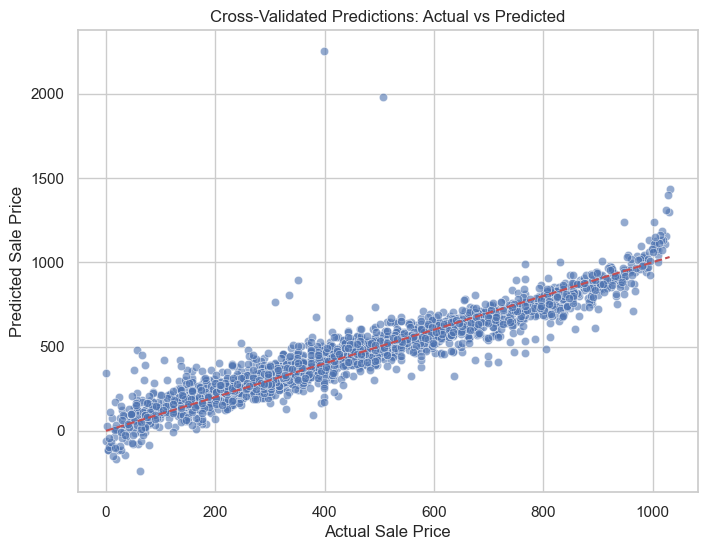

In [39]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_train, y=cv_preds, alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Cross-Validated Predictions: Actual vs Predicted")
plt.grid(True)
plt.show()

# Hyperparameter Tuning (RandomForest)

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [41]:
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

In [51]:
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [10, 20, None],
    'model__min_samples_split': [2, 5],
}

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

In [54]:
grid_search.fit(X_train_split, y_train_split)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         SimpleImputer(strategy='median'),
                                                                         Index(['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'G...
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'Sale Condition'],
      dtype='object'))])),
                                       ('model',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [10, 20, None],
                         'model__min_samples_split': [2, 5],
                         'model__n_estimators': [100, 200]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [60]:
best_model = grid_search.best_estimator_
y_val_pred = best_model.predict(X_val)

In [62]:
from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(y_val, y_val_pred)

In [64]:
print("MAE:", mae)
print("RMSE:", rmse)

MAE: 51.77264506405812
RMSE: 68.75535468365425


# Visualizations

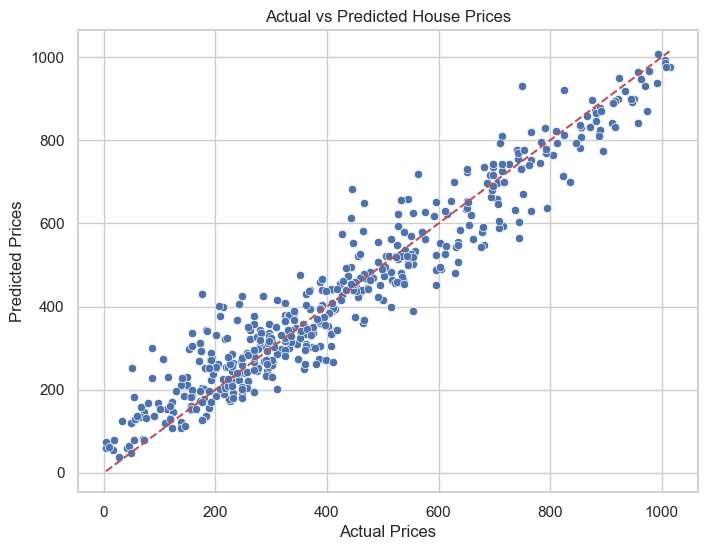

In [65]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_val, y=y_val_pred)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()

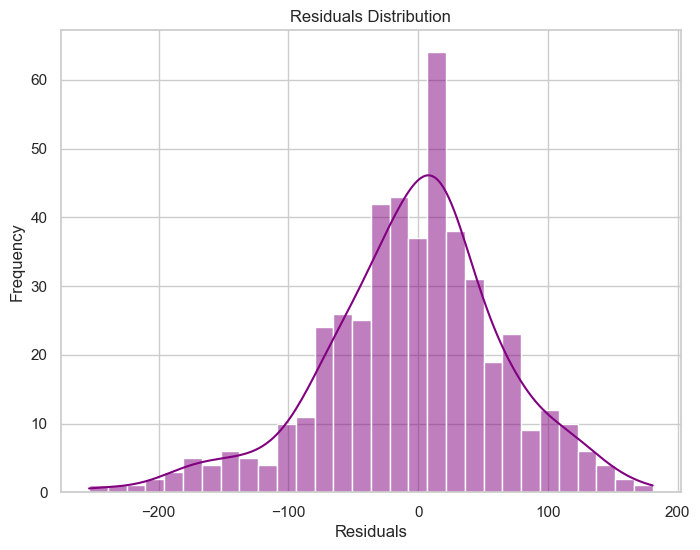

In [66]:
residuals = y_val - y_val_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='purple', bins=30)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

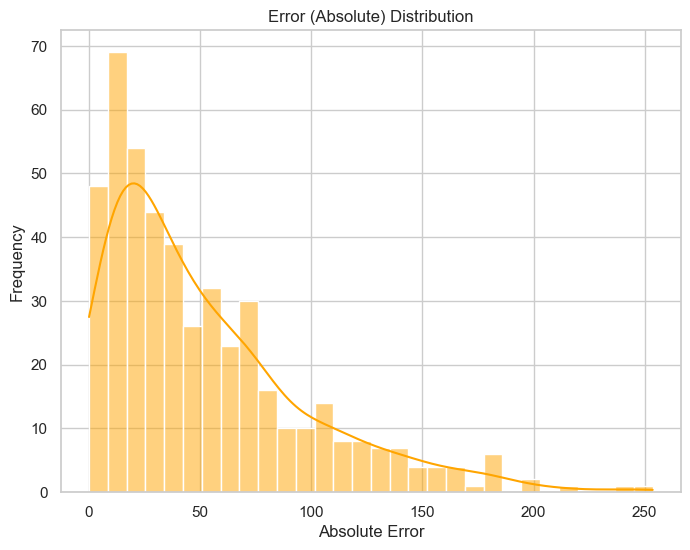

In [67]:
errors = np.abs(y_val - y_val_pred)
plt.figure(figsize=(8, 6))
sns.histplot(errors, kde=True, color='orange', bins=30)
plt.title("Error (Absolute) Distribution")
plt.xlabel("Absolute Error")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

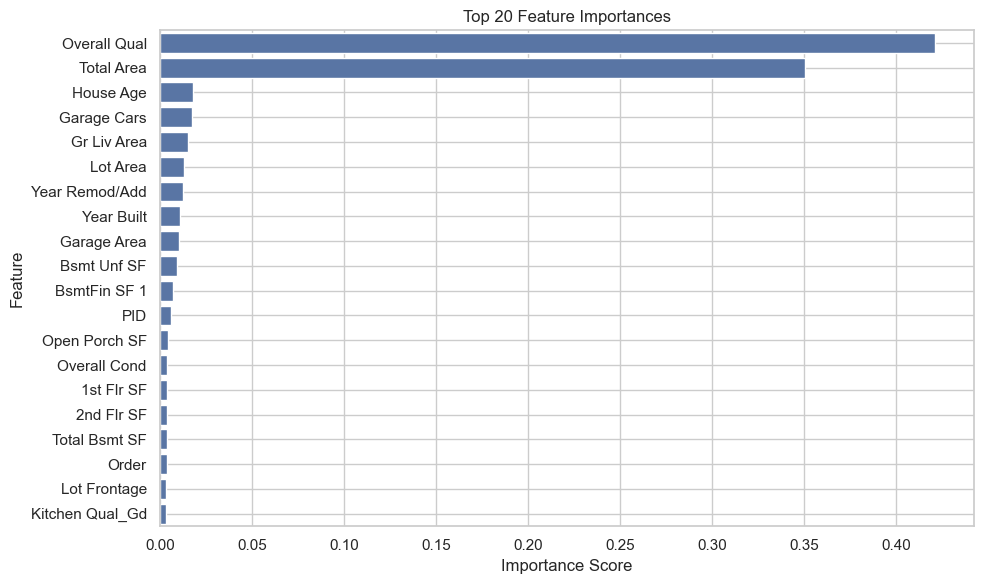

In [72]:
from sklearn.compose import ColumnTransformer

preprocessor = best_model.named_steps['preprocessor']
model = best_model.named_steps[list(best_model.named_steps)[-1]]

def get_feature_names(preprocessor):
    output_features = []

    for name, transformer, features in preprocessor.transformers_:
        if name == 'remainder':
            continue
        if hasattr(transformer, 'get_feature_names_out'):
            names = transformer.get_feature_names_out(features)
        else:
            names = features
        output_features.extend(names)
    return output_features

transformed_features = get_feature_names(preprocessor)

if hasattr(model, 'feature_importances_'):
    importances = model.feature_importances_
    importance_df = pd.DataFrame({
        "Feature": transformed_features,
        "Importance": importances
    }).sort_values(by="Importance", ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=importance_df.head(20), x="Importance", y="Feature", hue=None)
    plt.title("Top 20 Feature Importances")
    plt.xlabel("Importance Score")
    plt.ylabel("Feature")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Model does not provide feature importances.")


# Summary Dashboard

C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


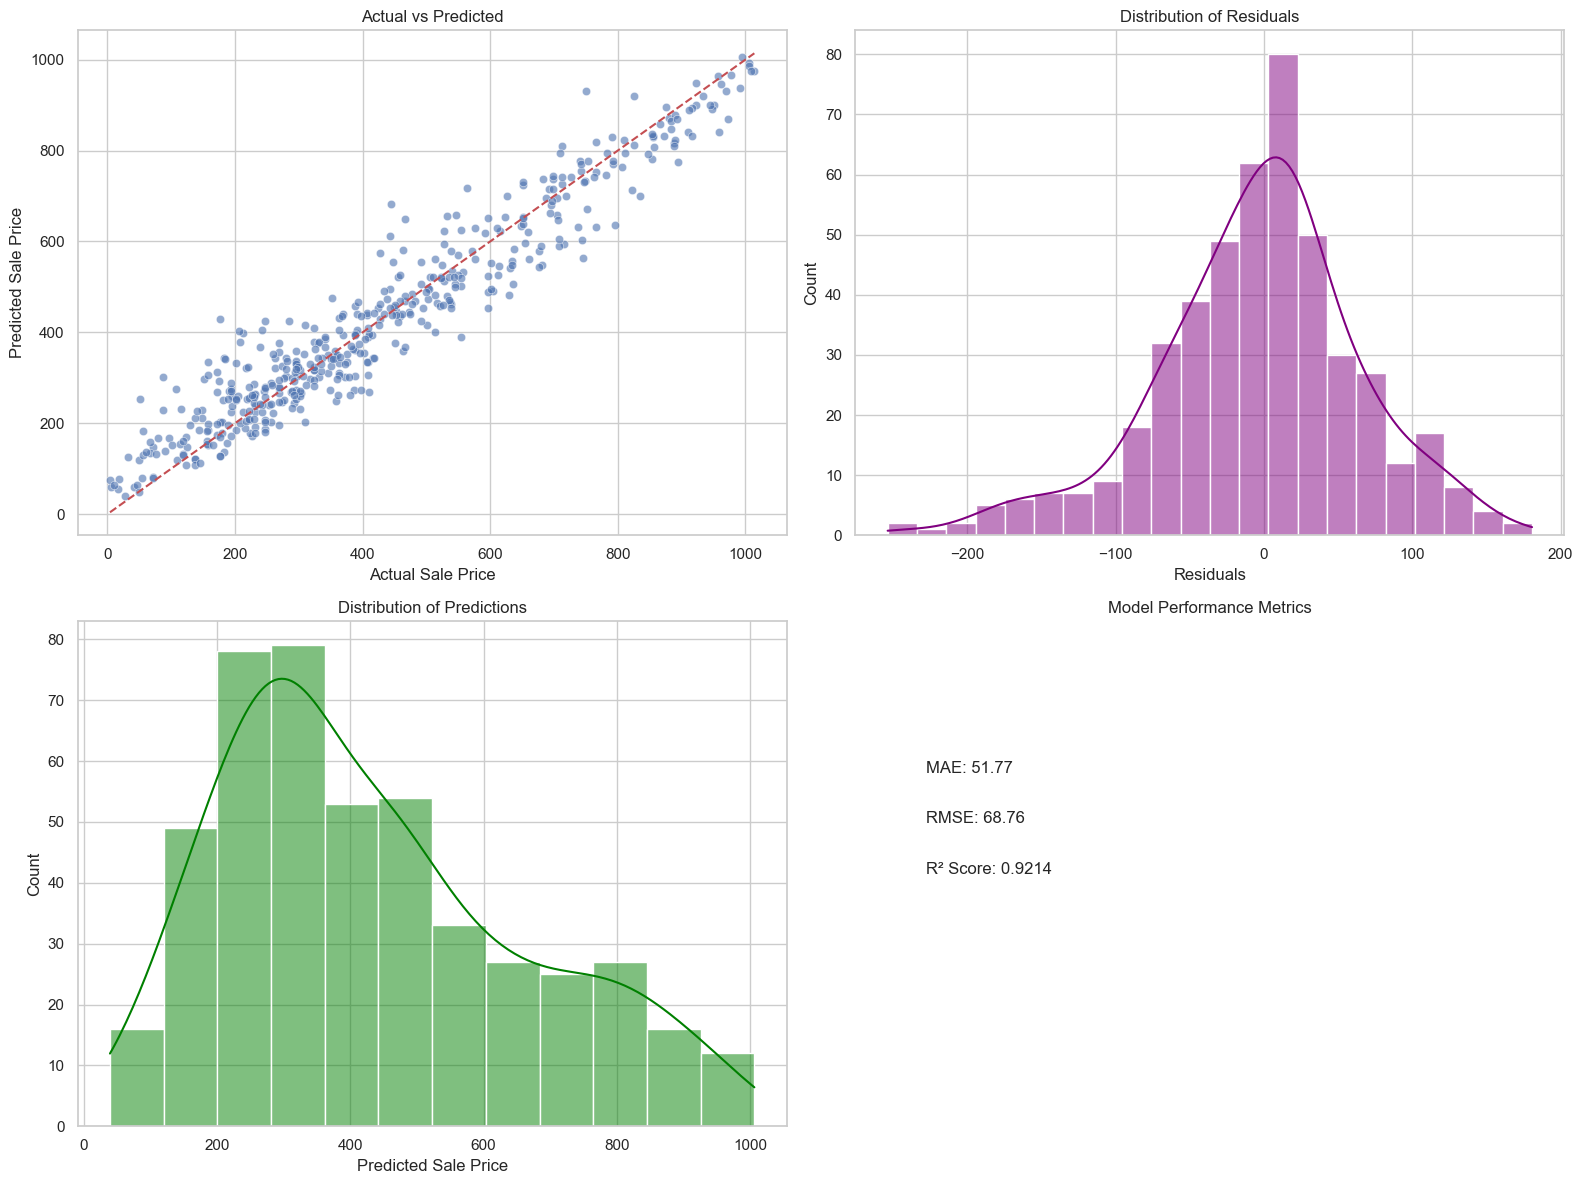

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_val_pred = best_model.predict(X_val)
mae = mean_absolute_error(y_val, y_val_pred)
rmse = mean_squared_error(y_val, y_val_pred, squared=False)
r2 = r2_score(y_val, y_val_pred)

plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
sns.scatterplot(x=y_val, y=y_val_pred, alpha=0.6)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted")

plt.subplot(2, 2, 2)
sns.histplot(y_val - y_val_pred, kde=True, color="purple")
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")

plt.subplot(2, 2, 3)
sns.histplot(y_val_pred, kde=True, color="green")
plt.xlabel("Predicted Sale Price")
plt.title("Distribution of Predictions")

plt.subplot(2, 2, 4)
plt.text(0.1, 0.7, f"MAE: {mae:.2f}", fontsize=12)
plt.text(0.1, 0.6, f"RMSE: {rmse:.2f}", fontsize=12)
plt.text(0.1, 0.5, f"R² Score: {r2:.4f}", fontsize=12)
plt.axis('off')
plt.title("Model Performance Metrics")

plt.tight_layout()
plt.show()